Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
Name: Monthly Mean Total Sunspot Number, dtype: float64


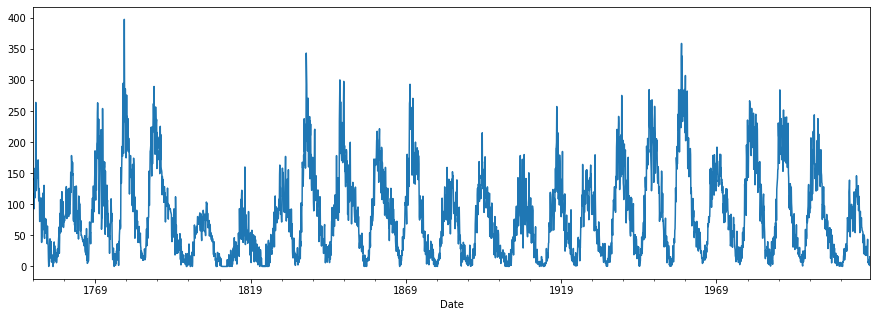

In [8]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

pyplot.figure(figsize=(15, 5))

series = read_csv('Sunspots - Sunspots.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

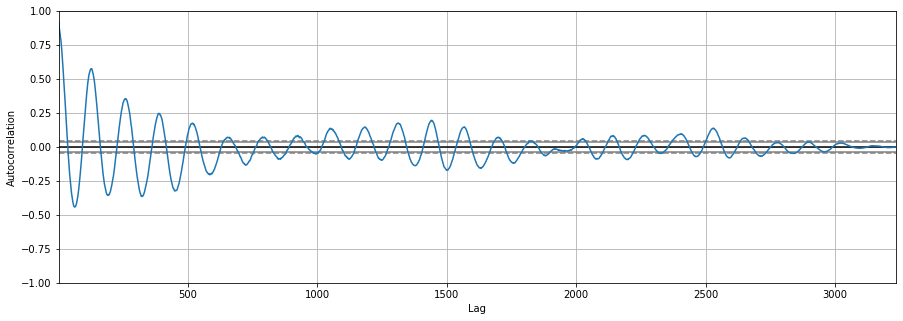

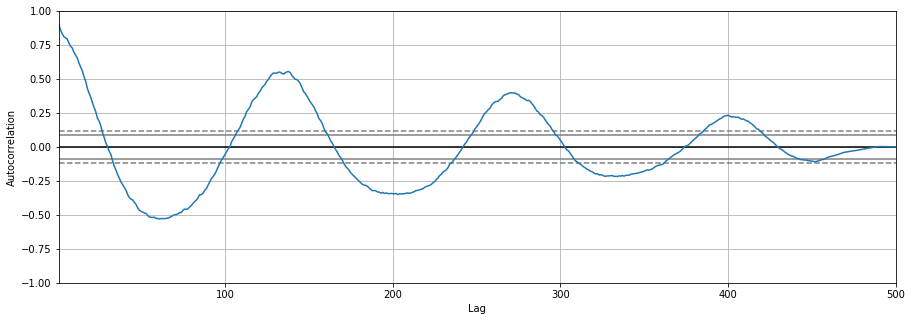

In [17]:
from pandas.plotting import autocorrelation_plot

pyplot.figure(figsize=(15, 5))

autocorrelation_plot(series)
pyplot.show()

pyplot.figure(figsize=(15, 5))

autocorrelation_plot(series[1000:1500])
pyplot.show()

## ≈ 130 Years

In [ ]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
series = read_csv('Sunspots - Sunspots.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/